In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "../Data/Advertising.csv"

adv = pd.read_csv(data_path, index_col= 0)

adv.describe()



,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


standard avvikelsen är lite mer avcrat att räkna på är för ppulationene.

kvartilerna 25, 50, 75. Så av alla så "25" av dom täcks av vad värdet. Så 75 och under är värdena, och det är 25 av alla värdena. 

Describe är mest nyttgit för count.



array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

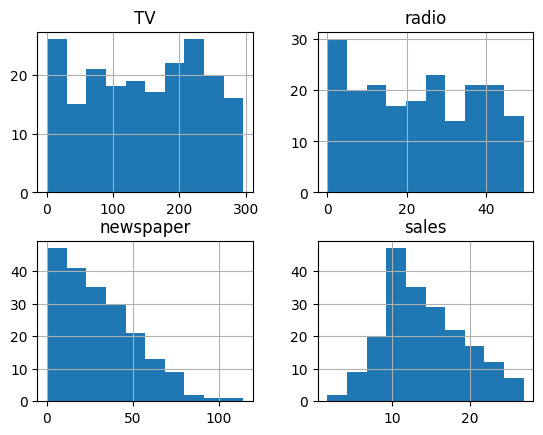

In [42]:
# Dom här histogram följer täthets funktionen. 
adv.hist()

### Histogram

Skapas av så måste man dela in datan i katogorier. Så datron delar här in i diskreta värden. Man skapar intervall so man ätter värena i. Som 9-20 tillexemple. Våran target ska HELST vara normal distruberad, annars går det inte får en linjär regression. Då får man börja med feuture enginering för att få den linjär. 

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>],
       [<Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

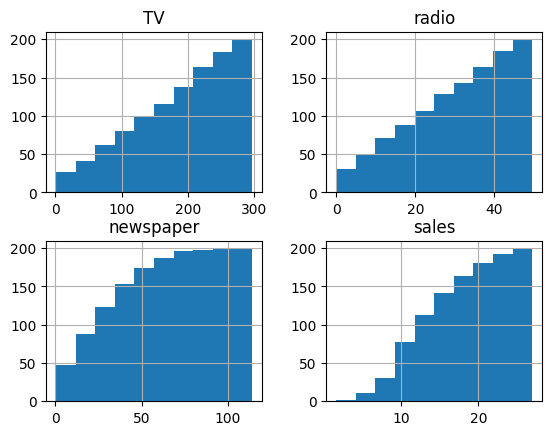

In [43]:
adv.hist(cumulative=True)

För den kumlativa histogramet ska ha som en S kurva för att linjära. 

Man ska inte luta sig på histgram distrubutioner för mycket. Framför allt med låg upplösing eller får fall i datan. Som här med bara 200 mätvärden och stora intreval. 

(array([[<Axes: title={'center': 'Gamma/Chi^2'}>,
         <Axes: title={'center': 'Standard Normal'}>],
        [<Axes: title={'center': 'Binomial'}>, <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'TV'}>,
         <Axes: title={'center': 'radio'}>],
        [<Axes: title={'center': 'newspaper'}>,
         <Axes: title={'center': 'sales'}>]], dtype=object))

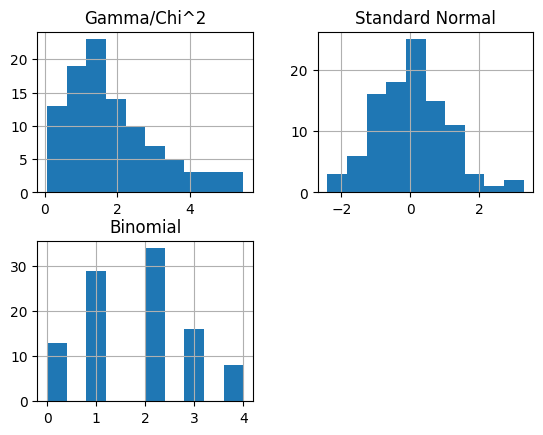

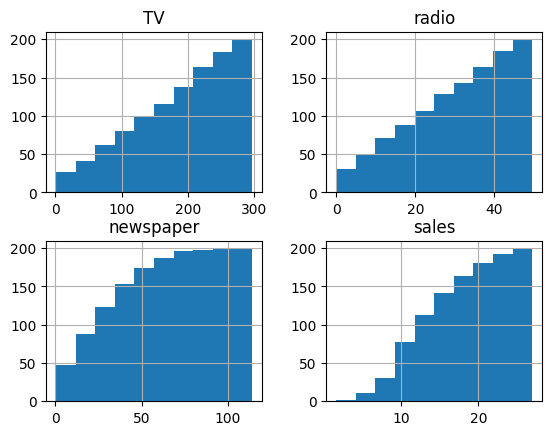

In [44]:
import pandas as pd
import numpy as np
df = pd.DataFrame (np.column_stack([np.random.gamma(2, 1, size =100) ,
np.random.standard_normal(size=100) ,
np.random.binomial(5, .3, size=100)]) ,
columns =["Gamma/Chi^2" , "Standard Normal" , "Binomial"])
df.hist (), adv.hist(cumulative=True)

Sannolikhets funktioner måste bli noll. Dom kan inte gå mot oändligheten utan att bli noll. För arean under distrubtionen för sannolikhets funktioner måste var ett. 

Probability density function (PDF):

The PDF is a function that describes the probability of a continuous random variable taking on a certain value. It is a mathematical function that describes the probability that a random variable will fall within a certain range of values.
Cumulative distribution function (CDF):

The CDF is a function that describes the probability that a random variable (continuous or discrete) will take on a value less than or equal to a certain value. It is a mathematical function that describes the probability that a random variable will fall within a certain range of values, up to and including a specific value.
Probability mass function (PMF):

The PMF is a function that describes the probability of a discrete random variable taking on a certain value. It is a mathematical function that describes the probability that a random variable will take on a specific value rather than falling within a range of values.
Summary:

In summary, PDFs are used to describe the probability of a continuous random variable taking on a certain value, CDFs are used to describe the probability that a random variable (continuous or discrete) will take on a value less than or equal to a certain value, and PMFs are used to describe the probability of a discrete random variable taking on a certain value.
Feature 	Probability Density Function (PDF) 	Cumulative Distribution Function (CDF) 	Probability Mass Function (PMF)
Function of 	Describes the likelihood of a continuous random variable taking on a specific value or falling within a specific interval 	Describes the probability that a random variable (continuous or discrete) will take on a value less than or equal to a certain value 	Describes the probability of a discrete random variable taking on a specific value
Types of Variables 	Continuous random variables 	Continuous and discrete random variables 	Discrete random variables
Probability 	The value of the PDF at a specific point indicates the probability density, not the probability itself 	The value of the CDF at a specific point indicates the probability that the random variable will take on a value less than or equal to that point 	The value of the PMF at a specific point indicates the probability of the random variable taking on that value
Sum or Integral 	The integral of the PDF over the entire range of the random variable equals 1 	The limit of the CDF as the random variable approaches positive infinity is 1 	The sum of the PMF over all possible values of the random variable equals 1
Visualization 	The PDF can be visualized as a curve, with the area under the curve representing the probability 	The CDF can be visualized as a curve that starts at 0 and increases monotonically to 1 	The PMF can be visualized as a bar chart, with each bar representing the probability of a specific value

 

<Axes: >

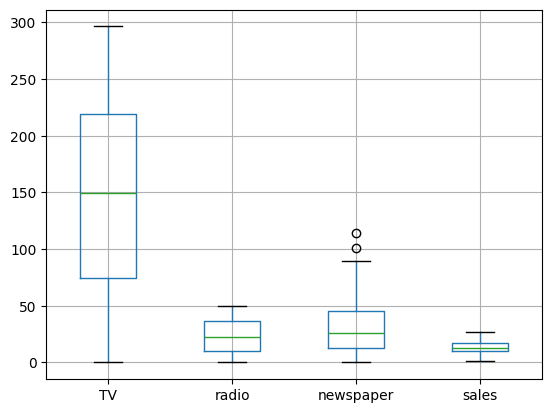

In [45]:
adv.boxplot()

Boxplots är test mot normal distribution och man får vart medlet förskjuts. Det vart boxen hamnar fömedlar medlet och hur förskjutet det är i intervallet. Tittar vi på newspaper så ser vi två cirklar som visar på att vi har värden uan för normal fördelningen. 

<Axes: >

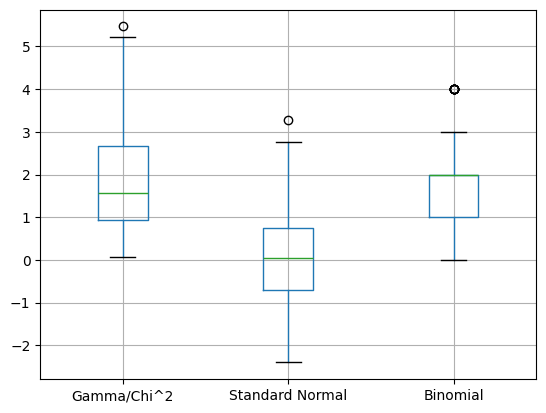

In [46]:
df.boxplot()

Problemet att dela upp diagram i intervall kallas för "Bining". 

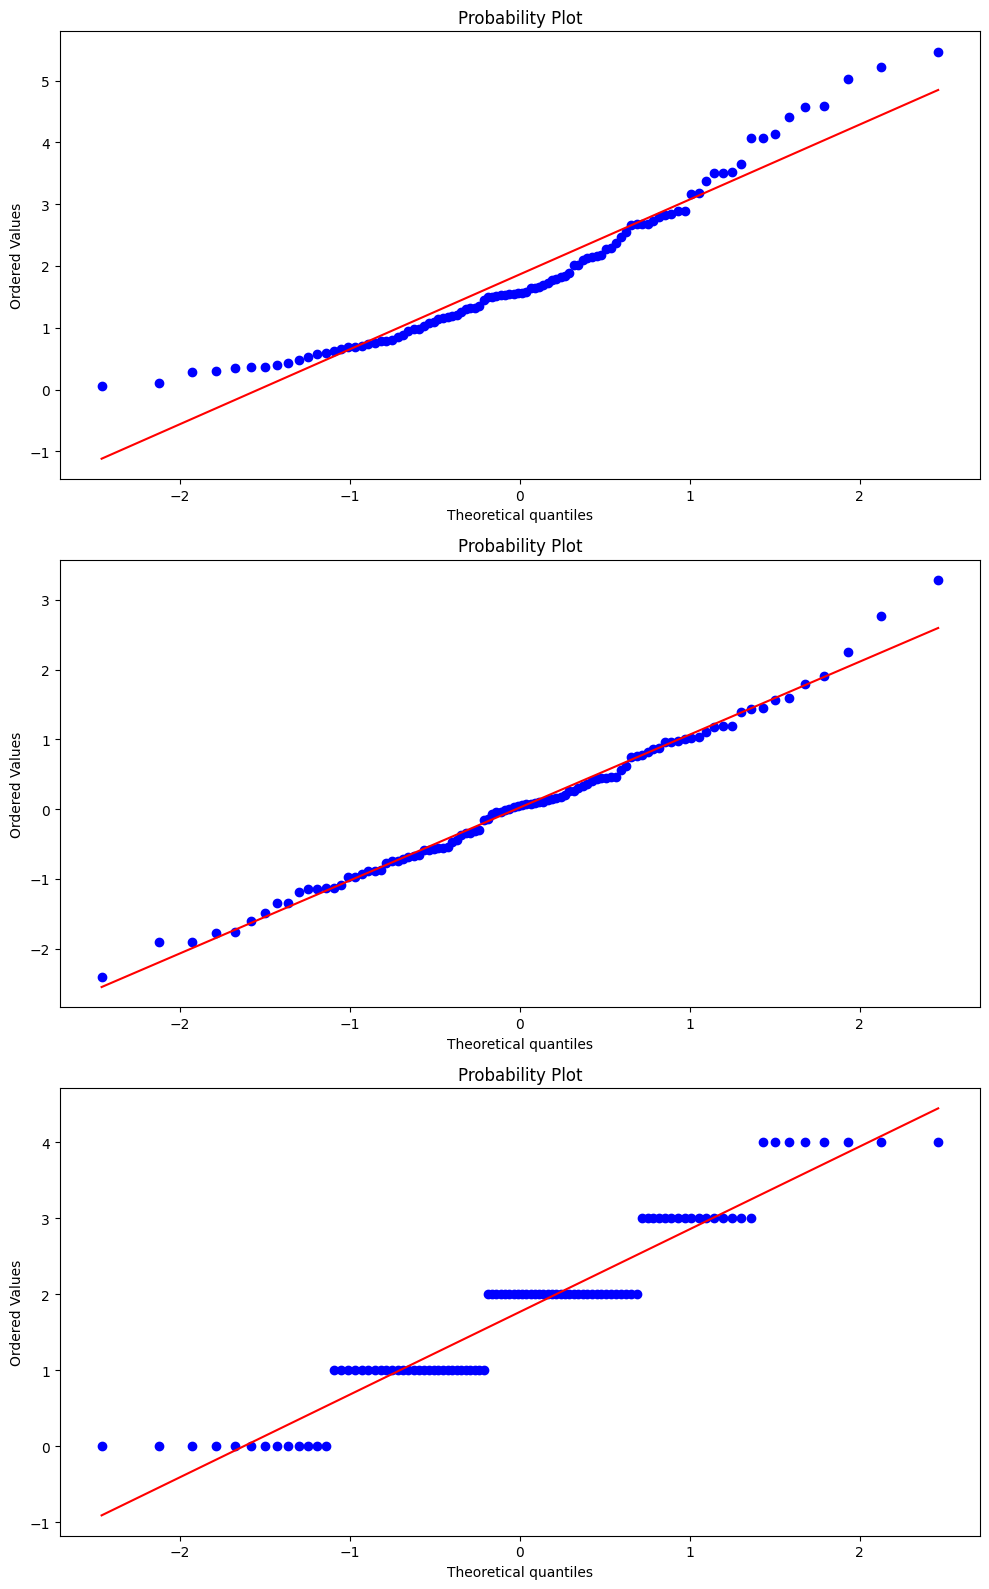

In [47]:
import scipy.stats as stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3 ,1, figsize= (10, 16))
stats.probplot(df["Gamma/Chi^2"].to_numpy(), plot= ax[0])
stats.probplot(df["Standard Normal"].to_numpy(), plot= ax[1])
stats.probplot(df["Binomial"].to_numpy(), plot= ax[2])
plt.tight_layout()
plt.show()

Om man vill ha ett klart bevis för om det är en Normal distrubution, så är en probplot bra för det ger en klar bild för om det är en normal distribution. För här väger vi värden direkt mot normal distributionen. 

x

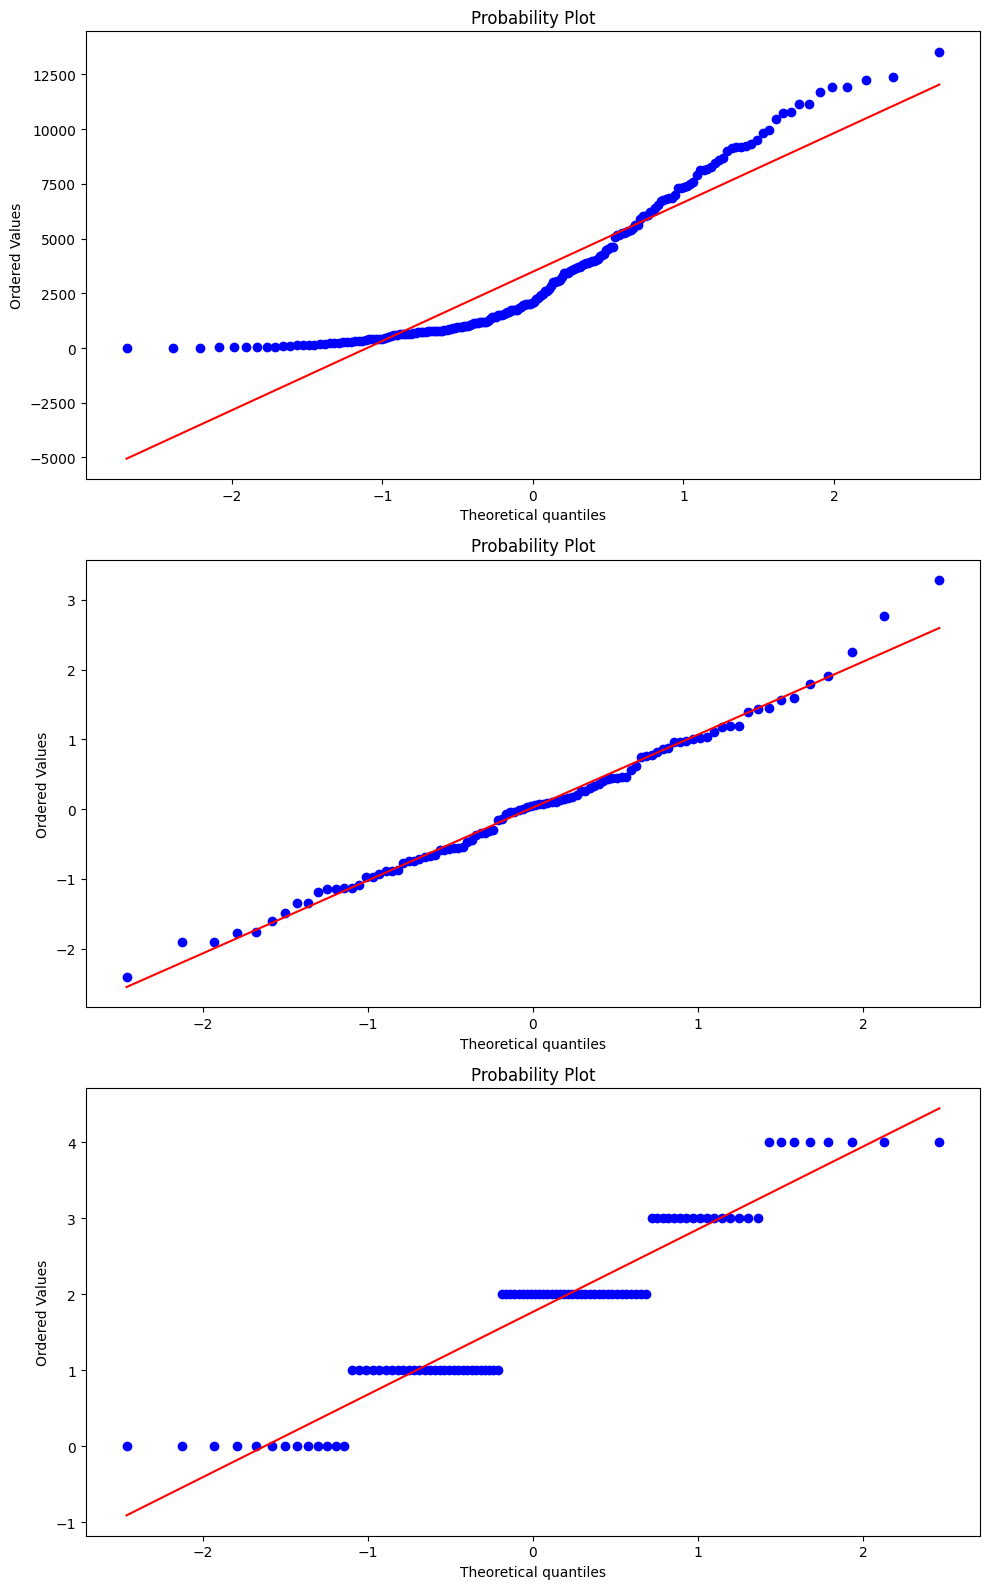

In [51]:
import scipy.stats as stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3 ,1, figsize= (10, 16))
stats.probplot(adv["TV"].to_numpy(), plot= ax[0])
stats.probplot(df["Standard Normal"].to_numpy(), plot= ax[1])
stats.probplot(df["Binomial"].to_numpy(), plot= ax[2])
plt.tight_layout()
plt.show()

Tittat vi på den övere grazfen så har vi en S kurva. Som visar på ett linjärt förhållande. Men den är inte helt perfekt för att förutse Y, utam behöver en intrektion från en anna variabel. Men på intrektions effkter kan vi inte titta på mot normal fördelningen. Den behöver en dimnosion till för att hitta linjära förhållandet. 

(Kolla igenom klippet igen om testa föruspåda $\hat{Y}$ mot faktiska Y)

In [52]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


VAd vi inte vill ha är starka relationer mellan kolumner. Då får man av för den kolinjära. Får då lär sig datan bara mellan dom två variblerna inte traget variabeln, den vi försöker förutsäga. Det finns börjar bli strak ju mer den går mot 1 eller -1, så +-0.5 och mot ett.   

$S^2 = \frac{1}{n-1} \sum_{i=1}_{n} (x_i - \overline{x})^2     \overline{x} = \sum_{i=1}^{n} \frac{x_i}{n}$

(På klipp igen för förklaring här)

$Y = \beta_0 + \beta_1x_1 +...+ \beta_dx_d$

Summan av alla måste det bli medlet av Y

$E[x_1 + x_2] = E[x_1] + E[x_2]$

$[x_1+x_2] = \sum_{X}\sum_{Y}(x+y)f_{xy}(x, y) = $
$\sum_{X}\sum_{Y}xf_{xy}(x, y) + \sum_{X}\sum_{Y}yf_{xy}(x, y)$

Sum operatorn kan vi bryta upp likt $E[x_1 + x_2]$

Dom här regelnar och bevisen måste gälla. Annars funker inte en linjär regression. Är vad som denfinerar linjäritet för våra variabler. 



$S^2$ is an unbiased estimator for $\sigma^2$, but $\sqrt{S^2} is real not an unbiased estimator of $\sigma$!

Solution: Standard error of the mean. SV: Standarad avvikelsen i medelet. 

$Var\overline{X} = \frac{\sigma^2}{n}$

$\sqrt{Var\overline{X}} = \frac{\sigma}{\sqrt{n}}$

När detta går mot oändligheten, stick provet blir störra, närmar sig detta vär de standard värdet. Detta värde är inte så viktigt i vår modeller. Vi bryr os inte så mycket vad statstiken om datan vi tränat på. Utan det är datan som vi kan förutspå som är intressant. 

I ML så är intreserad av RSE (Residual Standard Error) på var/test data. Fär när intrevallest blir mindre på n. Så får vi en snävare gräns. Det handlar om att ju mer data som man köra modellen på, ju större blir variansen, för ju mer kan vi förutse. Vi bryr inte så mycket om test datan för den visar bara på variansen av modellen mot verkliga värden. Vi vill ju förutspå nya värden som inte finns. 

$RSE = \sqrt{\frac{1}{n-2}}

¡Använd $\beta$ från tränings datan, but kalylate SSE on that!